In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!pip install import-ipynb

In [29]:
!cp '/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/food_distr.zip' .
!unzip -q food_distr.zip
!rm food_distr.zip

In [2]:
%cd '/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/notebooks'

/content/gdrive/.shortcut-targets-by-id/1Lqbq3dboVPe48Cxj_XZyhRs54U4hXhEM/[MIRCV]FoodWebSearch/notebooks


In [26]:
import import_ipynb
import index_creation as index
import numpy as np
import os
import tensorflow as tf
import PIL
from IPython.display import display
from tensorflow.python.ops import image_ops
from tensorflow.python.ops import io_ops
import utils

In [25]:
def show_img(path):
  img_disp = PIL.Image.open(path)
  img_disp.thumbnail((224,224))
  display(img_disp)

def find_img(names, path):
  res=[]
  for name in names:
    for root, dirs, files in os.walk(path):
      if name in files:
        res.append(str(os.path.join(root, name)))
  return res

def loadimg_keras(path):
  img = tf.keras.preprocessing.image.load_img(path, target_size=(224,224), interpolation='bilinear')
  img = tf.keras.preprocessing.image.img_to_array(img)
  img= tf.keras.applications.mobilenet_v2.preprocess_input(img)
  img = np.array([img])
  return img

def loadimg_tf(path):
  image = io_ops.read_file(path)
  image = image_ops.decode_image(image, channels=3, expand_animations=False)
  image = image_ops.resize_images_v2(image, (224,224), method='bilinear')
  image.set_shape((224, 224, 3))
  image=image.numpy()
  image= tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image=np.array([image])
  return image

In [5]:
vp_tree_mn = index.VP_Tree("index_mn",height=10, disk_mode=True, leaves_path='/content/')
vp_tree_mn.create_vptree('/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/mn_id.npy',
                         '/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/mn_features.npy')

Number of data: 126000
The max height of the tree is: 15
Tree is building
directory created /content/index_mn
Building of the tree completed in: 24.043627500534058 s


In [6]:
mobile_net = tf.keras.applications.MobileNetV2(include_top = False, input_shape=(224,224,3), pooling='avg')

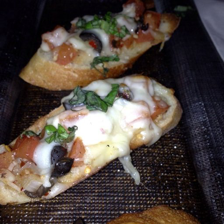

In [23]:
show_img('/content/food-101/1033851.jpg')

In [11]:
query = loadimg_keras('/content/food-101/1033851.jpg')
features = mobile_net.predict(query, verbose=1)

ids, distances = vp_tree_mn.knn_search(10, features)
ids_str = [id[0] for id in ids]
results = zip(ids_str,distances)

1/1 [==============================] - 0s 16ms/step
Query answered in 2.6199190616607666  s


In [12]:
query_tf = loadimg_tf('/content/food-101/1033851.jpg')
features_tf = mobile_net.predict(query_tf, verbose=1)

ids_tf, distances_tf = vp_tree_mn.knn_search(10, features_tf)
ids_str_tf = [id[0] for id in ids_tf]
results_tf = zip(ids_str_tf,distances_tf)

1/1 [==============================] - 0s 16ms/step
Query answered in 2.6773407459259033  s


In [14]:
print("Results with keras: ", ids_str)
print("Results with tf: ", ids_str_tf)

Results with keras:  ['1033851.jpg', '2194303.jpg', '2886287.jpg', '2260967.jpg', '2594782.jpg', '3092131.jpg', '1775643.jpg', '1295887.jpg', '2143643.jpg', '1866967.jpg']
Results with tf:  ['1033851.jpg', '2194303.jpg', '2594782.jpg', '3912924.jpg', '1762185.jpg', '2737837.jpg', '2260967.jpg', '2143643.jpg', '1860178.jpg', '1866967.jpg']


In [20]:
res=[]
for i in range(10):
  res.append(ids_str[i]==ids_str_tf[i])
print(res)

[True, True, False, False, False, False, False, False, False, True]


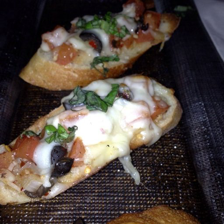

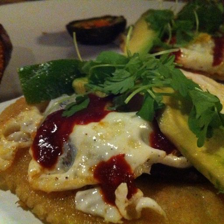

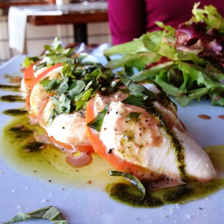

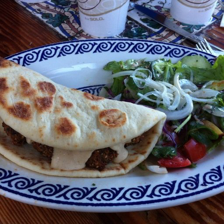

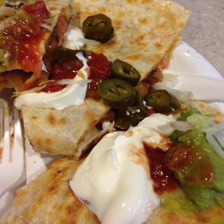

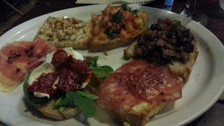

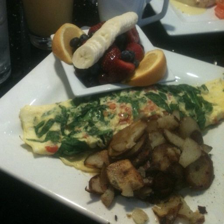

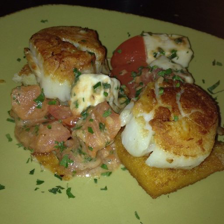

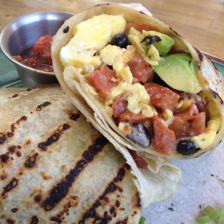

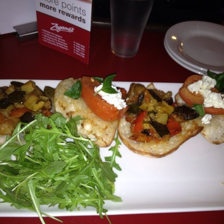

In [31]:
results = find_img(ids_str, '/content/food-101/1033851.jpg')
for img in results:
  show_img(img)

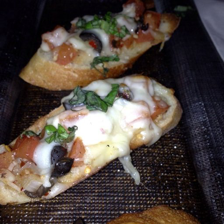

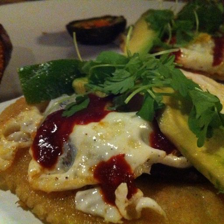

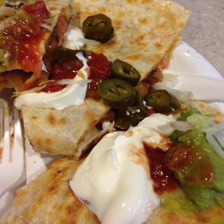

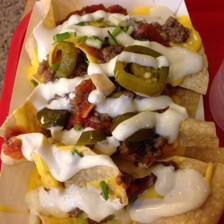

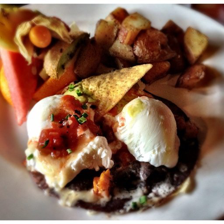

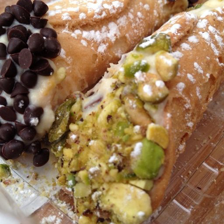

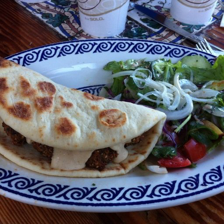

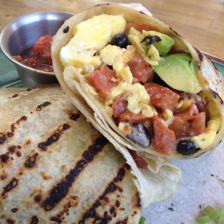

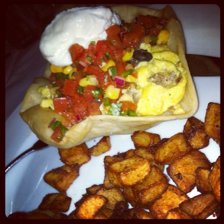

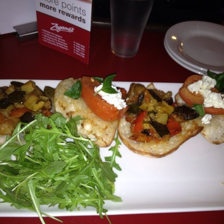

In [32]:
results = find_img(ids_str_tf, '/content/food-101/1033851.jpg')
for img in results:
  show_img(img)